# Seb Schwab
> EE 399 HW 1
https://github.com/sebschwab/ML-Training

Optimal Parameters: A=2.1716818723637914, B=0.9093249029166655, C=0.7324784894461773, D=31.45291849616531
Minimum Error: 1.592725853040056


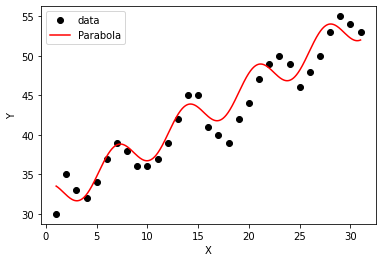

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Create Data
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Define the objective function to minimize the error
def objective_func(params, x, y):
    A, B, C, D = params
    e2 = np.sqrt((1/31)*np.sum((A*np.cos(B*x)+C*x+D-y)**2))
    return e2

# Define the initial guess for the parameters
params_init = np.array([3, 1*np.pi/4, 2/3, 32])    # 3 pi/4 2/3 32

# Define the bounds for the parameters
bounds = ((0, None), (0, None), (None, None), (None, None))

# Find the optimal parameters that minimize the error
result = opt.minimize(objective_func, params_init, args=(X, Y), method='Nelder-Mead')

# Print the optimal parameters and the minimum error
A, B, C, D = result.x
min_error = result.fun
print("Optimal Parameters: A={}, B={}, C={}, D={}".format(A, B, C, D))
print("Minimum Error: {}".format(min_error))

# generate the data for plotting
tt = np.arange(1, 31.01, 0.01)
yfit = (A*np.cos(B*tt)+C*tt+D)

# plot the raw data and the fitted curve
fig, ax = plt.subplots()
ax.plot(np.arange(1, 32), Y, 'ko', label="data")
ax.plot(tt, yfit, 'r-',  label='Parabola')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()


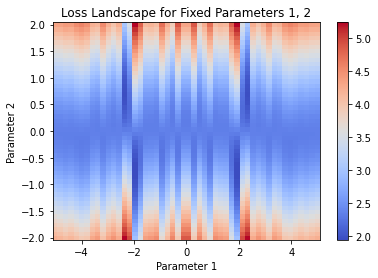

Optimal Parameters:  [ 5.03407453e-08  9.70430405e-01 -4.23103816e-09 -1.94085615e-08]
Minimum Loss:  10.579023302533644


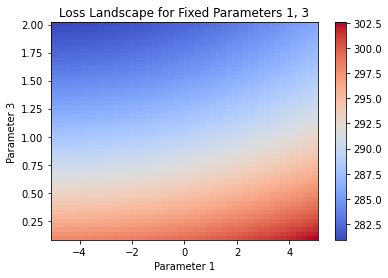

Optimal Parameters:  [-4.11641554e-09  1.01653084e+00 -4.86481720e-08  1.05000029e+00]
Minimum Loss:  5.025036068704326


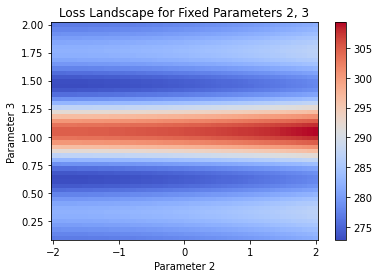

Optimal Parameters:  [ 2.99849373e+00  2.33270839e-03 -2.40156426e-07 -1.94848223e+00]
Minimum Loss:  5.025036069526221


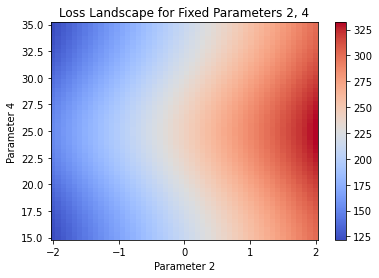

Optimal Parameters:  [ 5.61273284e-06  3.58053700e+00 -4.24003264e-07  2.49999992e+01]
Minimum Loss:  52.89511651268081


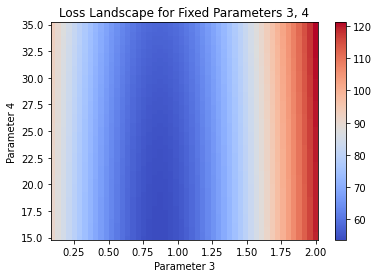

Optimal Parameters:  [ 1.00593965e+01 -4.38069854e-03  1.98184123e-04  1.49405270e+01]
Minimum Loss:  52.89511651324932


In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])


# Sweep through values of two parameters and fix the other two parameters (ensure within range of optimal)
fixed_params = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
swept_params = [(np.linspace(-5, 5, 50), np.linspace(-2, 2, 50)),
                (np.linspace(-5, 5, 50), np.linspace(0.1, 2, 50)),
                (np.linspace(-2, 2, 50), np.linspace(0.1, 2, 50)),
                (np.linspace(-2, 2, 50), np.linspace(15, 35, 50)),
                (np.linspace(0.1, 2, 50), np.linspace(15, 35, 50))]

for i, (fixed, (x, y)) in enumerate(zip(fixed_params, swept_params)):
    # Define the initial guess for the parameters
    params_init = np.array([3, 1*np.pi/4, 2/3, 32])    # 3 pi/4 2/3 32

    # Set the fixed parameters
    params_init[fixed[0]-1] = fixed[1]
    params_init[fixed[1]-1] = fixed[0]

    # Calculate the loss for each combination of swept parameters
    loss = np.zeros((len(x), len(y)))
    for i, a in enumerate(x):
        for j, b in enumerate(y):
            params = np.copy(params_init)
            params[fixed[0]-1] = a
            params[fixed[1]-1] = b
            loss[i, j] = objective_func(params, X, Y)

    # Plot the loss landscape using pcolor
    fig = plt.figure()
    ax = fig.add_subplot(111)
    X, Y = np.meshgrid(x, y)
    pcm = ax.pcolor(X, Y, loss, cmap='coolwarm')
    ax.set_xlabel('Parameter {}'.format(fixed[0]))
    ax.set_ylabel('Parameter {}'.format(fixed[1]))
    ax.set_title('Loss Landscape for Fixed Parameters {}, {}'.format(fixed[0], fixed[1]))
    plt.colorbar(pcm)
    plt.show()

    # Find the minimum loss and the corresponding optimal parameters
    result = opt.minimize(objective_func, params_init, args=(X, Y))
    
    # Print the results
    print("Optimal Parameters: ", result.x)
    print("Minimum Loss: ", result.fun)


C:\Users\seb1s\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Model        | Training error | Test error
-----------------------------------------
Line         | 10.0598     | 12.4455
Parabola     | 9.0358     | 83.5205
19th degree  | 0.0016     | 901339783146990993408.0000


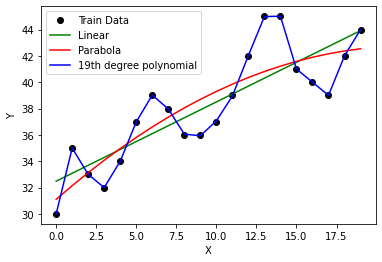

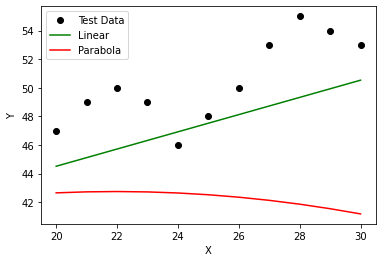

In [8]:
# Test using first 20 vs last 10
# define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# split the data into training and test sets
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]

# fit a line to the training data
coefficients = np.polyfit(X_train, Y_train, 1)
Y_train_pred1 = np.polyval(coefficients, X_train)
loss_train_line = np.sum((1/10)*(Y_train - Y_train_pred1) ** 2)
Y_test_pred1 = np.polyval(coefficients, X_test)
loss_test_line = np.sum((1/10)*(Y_test - Y_test_pred1) ** 2)

# fit a parabola to the training data
coefficients = np.polyfit(X_train, Y_train, 2)
Y_train_pred2 = np.polyval(coefficients, X_train)
loss_train_parabola = np.sum((1/10)*(Y_train - Y_train_pred2) ** 2)
Y_test_pred2 = np.polyval(coefficients, X_test)
loss_test_parabola = np.sum((1/10)*(Y_test - Y_test_pred2) ** 2)


# fit a 19th degree polynomial to the training data
coefficients = np.polyfit(X_train, Y_train, 19)
Y_train_pred3 = np.polyval(coefficients, X_train)
loss_train_poly = np.sum((1/10)*(Y_train - Y_train_pred3) ** 2)
Y_test_pred3 = np.polyval(coefficients, X_test)
loss_test_poly = np.sum((1/10)*(Y_test - Y_test_pred3) ** 2)

# print the results
print('Model        | Training error | Test error')
print('-----------------------------------------')
print(f'Line         | {loss_train_line:.4f}     | {loss_test_line:.4f}')
print(f'Parabola     | {loss_train_parabola:.4f}     | {loss_test_parabola:.4f}')
print(f'19th degree  | {loss_train_poly:.4f}     | {loss_test_poly:.4f}')

# plot the results
fig, ax = plt.subplots()
ax.plot(X_train, Y_train, 'ko', label='Train Data')
ax.plot(X_train, Y_train_pred1, 'g-', label='Linear')
ax.plot(X_train, Y_train_pred2, 'r-',  label='Parabola')
ax.plot(X_train, Y_train_pred3, 'b-',  label='19th degree polynomial')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

# plot the results
fig, ax = plt.subplots()
ax.plot(X_test, Y_test, 'ko', label='Test Data')
ax.plot(X_test, Y_test_pred1, 'g-', label='Linear')
ax.plot(X_test, Y_test_pred2, 'r-',  label='Parabola')
# Cannot Show Poly pot -> highly incorrect and poorly conditioned
# ax.plot(X_test, Y_test_pred3, 'b-',  label='19th degree polynomial')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()


C:\Users\seb1s\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Model        | Training error | Test error
-----------------------------------------
Line         | 6.8574     | 8.6454
Parabola     | 6.8512     | 8.4437
19th degree  | 0.0537     | 257651.5257


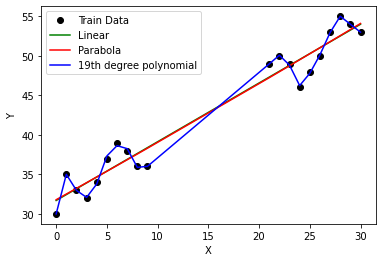

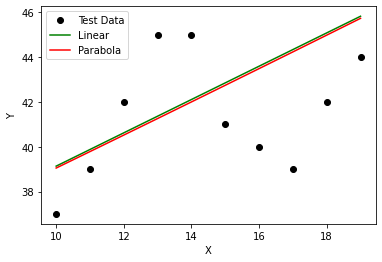

In [7]:
# Test using outside 20, (10 from left and 10 from right) vs middle 10
# define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# split the data into training and test sets
X_train = np.concatenate([X[:10], X[21:]])
Y_train = np.concatenate([Y[:10], Y[21:]])
X_test, Y_test = X[10:20], Y[10:20]

# fit a line to the training data
coefficients = np.polyfit(X_train, Y_train, 1)
Y_train_pred1 = np.polyval(coefficients, X_train)
loss_train_line = np.sum((1/10)*(Y_train - Y_train_pred1) ** 2)
Y_test_pred1 = np.polyval(coefficients, X_test)
loss_test_line = np.sum((1/10)*(Y_test - Y_test_pred1) ** 2)

# fit a parabola to the training data
coefficients = np.polyfit(X_train, Y_train, 2)
Y_train_pred2 = np.polyval(coefficients, X_train)
loss_train_parabola = np.sum((1/10)*(Y_train - Y_train_pred2) ** 2)
Y_test_pred2 = np.polyval(coefficients, X_test)
loss_test_parabola = np.sum((1/10)*(Y_test - Y_test_pred2) ** 2)


# fit a 19th degree polynomial to the training data
coefficients = np.polyfit(X_train, Y_train, 19)
Y_train_pred3 = np.polyval(coefficients, X_train)
loss_train_poly = np.sum((1/10)*(Y_train - Y_train_pred3) ** 2)
Y_test_pred3 = np.polyval(coefficients, X_test)
loss_test_poly = np.sum((1/10)*(Y_test - Y_test_pred3) ** 2)

# print the results
print('Model        | Training error | Test error')
print('-----------------------------------------')
print(f'Line         | {loss_train_line:.4f}     | {loss_test_line:.4f}')
print(f'Parabola     | {loss_train_parabola:.4f}     | {loss_test_parabola:.4f}')
print(f'19th degree  | {loss_train_poly:.4f}     | {loss_test_poly:.4f}')

# plot the results
fig, ax = plt.subplots()
ax.plot(X_train, Y_train, 'ko', label='Train Data')
ax.plot(X_train, Y_train_pred1, 'g-', label='Linear')
ax.plot(X_train, Y_train_pred2, 'r-',  label='Parabola')
ax.plot(X_train, Y_train_pred3, 'b-',  label='19th degree polynomial')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

# plot the results
fig, ax = plt.subplots()
ax.plot(X_test, Y_test, 'ko', label='Test Data')
ax.plot(X_test, Y_test_pred1, 'g-', label='Linear')
ax.plot(X_test, Y_test_pred2, 'r-',  label='Parabola')
# Cannot Show Poly pot -> highly incorrect and poorly conditioned
# ax.plot(X_test, Y_test_pred3, 'b-',  label='19th degree polynomial')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()
